# E-Commerce Intellect - <br>
# Enhancing E-Commerce Experience


# Project Description
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

This data of Product Shipment Tracking, answer question:
was the product delivered on time?

# Data Science Problem:
Predicting Timely Product Delivery

# Problem Description:
Given historical data on product deliveries, the task is to build a classification model that predicts whether a product will be delivered on time or not.<br>
The above problem can be categorised as **Categorical problem**

# Objective:
Develop a predictive model to classify product deliveries as either on-time or delayed based on historical delivery data


# The data contains the following information:

**ID**: ID Number of Customers.<br>
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br>
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
**Cost of the product**: Cost of the Product in US Dollars.<br>
**Prior purchases**: The Number of Prior Purchase.<br>
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
**Gender**: Male and Female.<br>
**Discount offered**: Discount offered on that specific product.<br>
**Weight in gms**: It is the weight in grams.<br>
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.<br>

# Workflow - 
1- Import Modules <br>
2- Load the dataset - read the data and try to understand <br>
2- Data Analysis - Exploration and Visualization <br>
4- Data Preparation for modelling <br>
5- Modelling - Basic Model, Undersampling, Oversampling <br>
6- Comparision different model <br>
7- Indentify best modal <br>


In [3]:
# import modules and load the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import RobustScaler

# Data Description
Now we read data and try to understand each of the feature. The python module pandas provides us with the function to read the data. In the next step we will read the data from our directory where data is saved and the we look first five and last five rows of the data 

In [4]:
data = pd.read_csv("Dataset.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [5]:
# to get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
#Summary of the data - describe() is a method used on a data frame to view the statistical description of the numerical columns in the data frame.
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
#Lets get the shape of the data, shape is a tuple with two numbers. That's the first number represents the number of rows (axis-0), and the second number represents the number of columns (axis-1).
data.shape

(10999, 12)

In [8]:
# check if there is any null value in the data
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
# find if there is any NaN value present in the data
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
#Get the data type of each feature
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

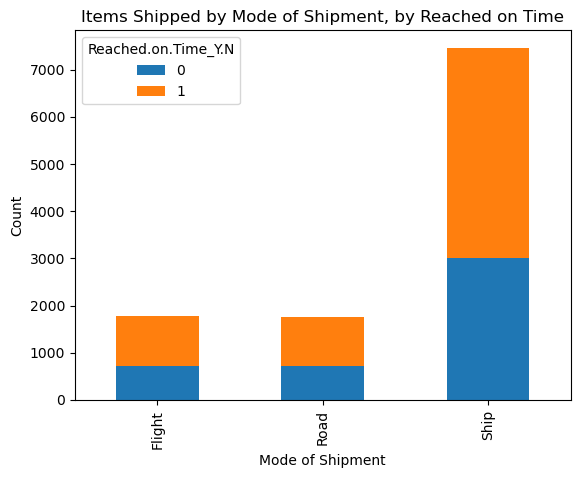

In [11]:
# analyse product reached on time with respect to mode of shipment where 1 not delivered on time and 0 delivered on time

grouped = data.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()

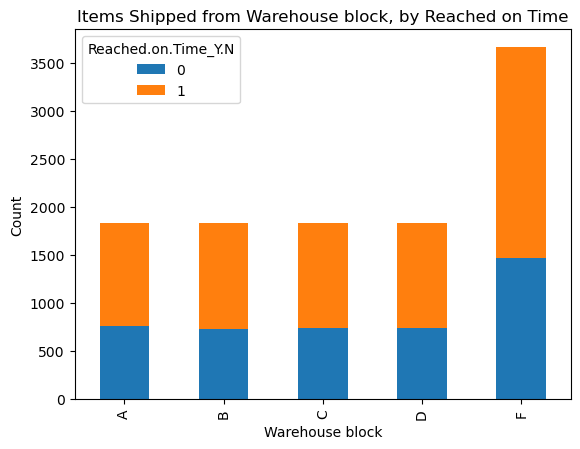

In [12]:
# analyse product reached on time with respect to mode of shipment where 1 not delivered on time and 0 delivered on time

grouped = data.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Warehouse block')
plt.ylabel('Count')
plt.title('Items Shipped from Warehouse block, by Reached on Time')
plt.show()

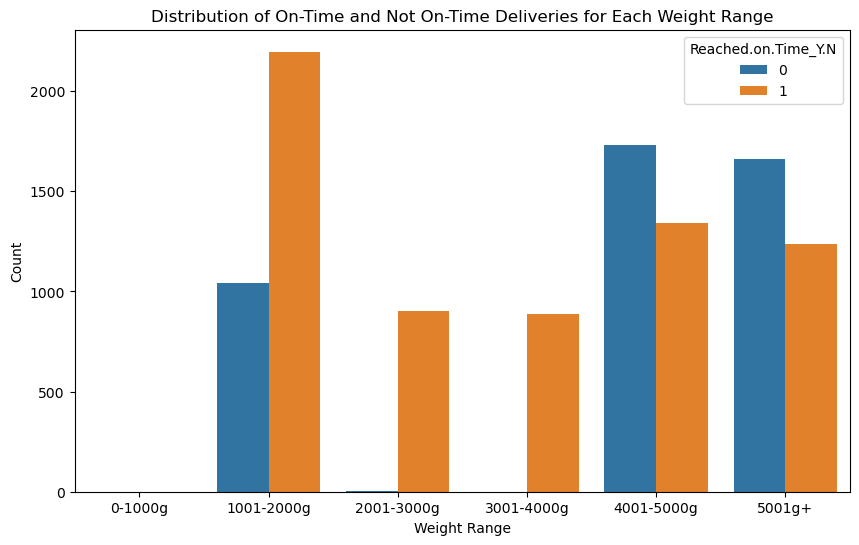

In [18]:
#Distribution of On-Time and Not On-Time Deliveries for Each Weight Range

# Create bins for weight ranges
weight_bins = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
weight_labels = ['0-1000g', '1001-2000g', '2001-3000g', '3001-4000g', '4001-5000g', '5001g+']
data['Weight Range'] = pd.cut(data['Weight_in_gms'], bins=weight_bins, labels=weight_labels, right=False)

# Count plot showing the distribution of on-time and not on-time deliveries for each weight range
plt.figure(figsize=(10, 6))
sns.countplot(x='Weight Range', hue='Reached.on.Time_Y.N', data=data)

plt.title('Distribution of On-Time and Not On-Time Deliveries for Each Weight Range')
plt.xlabel('Weight Range')
plt.ylabel('Count')
plt.show()


Then we shall calculate the percentage of the reached on time and not reached on time in the dataset

In [19]:
print('Reached on time: ', round(data['Reached.on.Time_Y.N'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

print('Not reached on time: ', round(data['Reached.on.Time_Y.N'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


Reached on time:  40.33 % of the dataset
Not reached on time:  59.67 % of the dataset


**Based on the result provided above, it appears that there is class imbalance in the dataset. The class "Not reached on time" is more prevalent, accounting for approximately 59.67% of the dataset, while the class "Reached on time" only accounts for around 40.33%.**

# Visualizing the class Imbalance

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

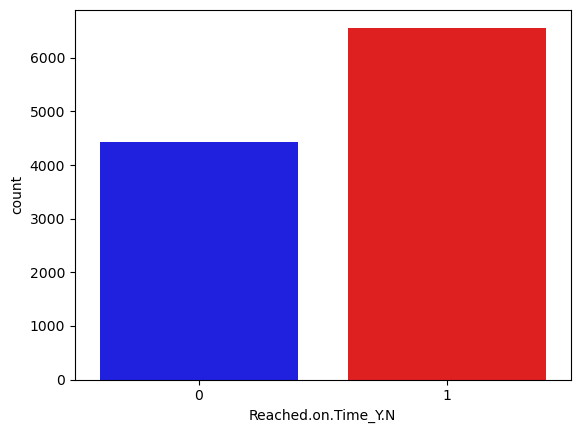

In [20]:
colors = ['blue','red']

sns.countplot('Reached.on.Time_Y.N', data=data, palette=colors)

# Visualizing the correlation matrix using Seaborn 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'Customer_care_calls'),
  Text(0, 1.5, 'Customer_rating'),
  Text(0, 2.5, 'Cost_of_the_Product'),
  Text(0, 3.5, 'Prior_purchases'),
  Text(0, 4.5, 'Discount_offered'),
  Text(0, 5.5, 'Weight_in_gms'),
  Text(0, 6.5, 'Reached.on.Time_Y.N'),
  Text(0, 7.5, 'Warehouse_block_A'),
  Text(0, 8.5, 'Warehouse_block_B'),
  Text(0, 9.5, 'Warehouse_block_C'),
  Text(0, 10.5, 'Warehouse_block_D'),
  Text(0, 11.5, 'Warehouse_block_F'),
  Text(0, 12.5, 'Mode_of_Shipment_Flight'),
  Text(0, 13.5, 'Mode_of_Shipment_Road'),
  Text(0, 14.5, 'Mode_of_Shipment_Ship'),
  Text(0, 15.5, 'Product_importance_high'),
  Text(0, 16.5, 'Product_importance_low'),
  Text(0, 17.5, 'Product_importance_medium')])

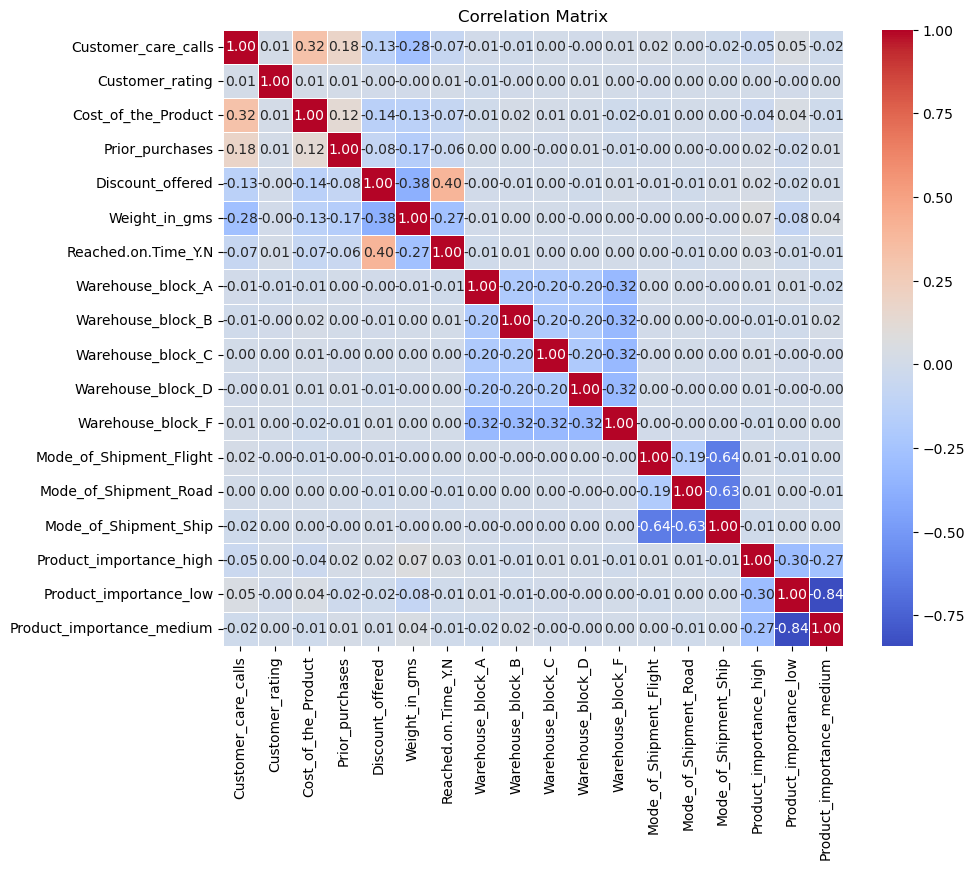

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Data Preprocessing and Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = data.loc[:,data.columns !='Reached.on.Time_Y.N']
y= data.loc[:,data.columns == 'Reached.on.Time_Y.N']
y.shape
print(data['Reached.on.Time_Y.N'].value_counts()[0])
print(data['Reached.on.Time_Y.N'].value_counts()[1])

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

4436
6563
Transactions in X_train dataset:  (7699, 12)
Transaction classes in y_train dataset:  (7699, 1)
Transactions in X_test dataset:  (3300, 12)
Transaction classes in y_test dataset:  (3300, 1)


# Drop unwanted columns


In [44]:
import pandas as pd

# Load dataset 
data = pd.read_csv("Dataset.csv")

# dop unwanted columns

data = data.drop(['ID','Gender'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


# Data Encoding
Label Encoding:

Use Label Encoding when categorical feature has an ordinal relationship, meaning the categories have a natural order or ranking. In such cases, assigning numerical labels can capture this ordinality. Label Encoding reduces the dimensionality of the dataset because it replaces categories with integers. This can be beneficial when dealing with a large number of unique categories. One-Hot Encoding:


In [45]:
import pandas as pd

# Select the categorical columns you want to one-hot encode
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns)

# Now, the selected categorical columns in the 'data' DataFrame are one-hot encoded.

data.head()



,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


# Feature Scaling

Standardization is a common preprocessing step in machine learning that transforms features to have a mean of 0 and a standard deviation of 1. It helps ensure that all features have the same scale, which can improve the performance of certain machine learning algorithms.


In [46]:
from sklearn.preprocessing import StandardScaler

# Select features and target variable
X = data.loc[:,data.columns !='Reached.on.Time_Y.N']
y= data.loc[:,data.columns == 'Reached.on.Time_Y.N']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature variables
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled features
print(X_scaled_df)


       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                -0.047711        -0.700755            -0.690722   
1                -0.047711         1.421578             0.120746   
2                -1.799887        -0.700755            -0.565881   
3                -0.923799         0.006689            -0.711529   
4                -1.799887        -0.700755            -0.545074   
...                    ...              ...                  ...   
10994            -0.047711        -1.408199             0.869792   
10995            -0.047711        -1.408199             0.453655   
10996             0.828377         0.714133             0.661724   
10997             0.828377        -0.700755             0.266394   
10998            -1.799887         1.421578            -1.148472   

       Prior_purchases  Discount_offered  Weight_in_gms  Warehouse_block_A  \
0            -0.372735          1.889983      -1.468240          -0.447189   
1            -1.029424     

# Divide the data into features and labels for below problem


In [47]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = data.loc[:,data.columns !='Reached.on.Time_Y.N']
y= data.loc[:,data.columns == 'Reached.on.Time_Y.N']
y.shape
print(data['Reached.on.Time_Y.N'].value_counts()[0])
print(data['Reached.on.Time_Y.N'].value_counts()[1])

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

4436
6563
Transactions in X_train dataset:  (7699, 17)
Transaction classes in y_train dataset:  (7699, 1)
Transactions in X_test dataset:  (3300, 17)
Transaction classes in y_test dataset:  (3300, 1)


# Apply SMOTE Technique
SMOTE stands for Synthetic Minority Over-sampling Technique. SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


Understanding SMOTE:

Achieving Balanced Classes : Using the distances between the closest neighbors of the minority class, SMOTE creates synthetic points in between these distances in order to reach an equal balance between the minority and majority class.
Effect: More information is retained since we don't have to delete any rows unlike in random undersampling(where we remove some data samples of majority class to achieve class balance).
Accuracy - Time Tradeoff: More the number of data samples, more the training time which tends to increase performance. Less the number of data samples, less the information and thus less probable of decent performance.


In [48]:
from imblearn.over_sampling import SMOTE

print("Before over-sampling:\n", y_train['Reached.on.Time_Y.N'].value_counts())

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train['Reached.on.Time_Y.N'])

print("After over-sampling:\n", y_train_res.value_counts())

Before over-sampling:
 1    4642
0    3057
Name: Reached.on.Time_Y.N, dtype: int64
After over-sampling:
 1    4642
0    4642
Name: Reached.on.Time_Y.N, dtype: int64


# Build the Model
# Training the Classification Algorithm
# Let us use logistic regression for this classification problem.

In [49]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

parameters = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression(solver='lbfgs', max_iter=1000)  # Specify the solver explicitly

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=1)

k = clf.fit(X_train_res, y_train_res)

print(k.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.689 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.669 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.681 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.701 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.660 total time=   0.1s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.662 total time=   0.1s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.656 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.733 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.763 total time=   0.1s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.633 total time=   0.1s
[CV 2/5] END .................C=0.1, penalty=l2;,

# Calculating Recall Metric using Confusion Metrices

In [51]:
from sklearn.metrics import confusion_matrix

lr_gridcv_best = clf.best_estimator_
y_test_pre = lr_gridcv_best.predict(X_test)
cnf_matrix_test = confusion_matrix (y_test, y_test_pre)

print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))

y_train_pre = lr_gridcv_best.predict (X_train_res)

cnf_matrix_train = confusion_matrix (y_train_res, y_train_pre)

print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

Recall metric in the test dataset: 0.568974492451848
Recall metric in the train dataset: 0.5853080568720379


# Visualize the Confusion Matrix for logistics regression model
Let us visualize the confusion matrices for the predictions made on the test set and over-sampled train set.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


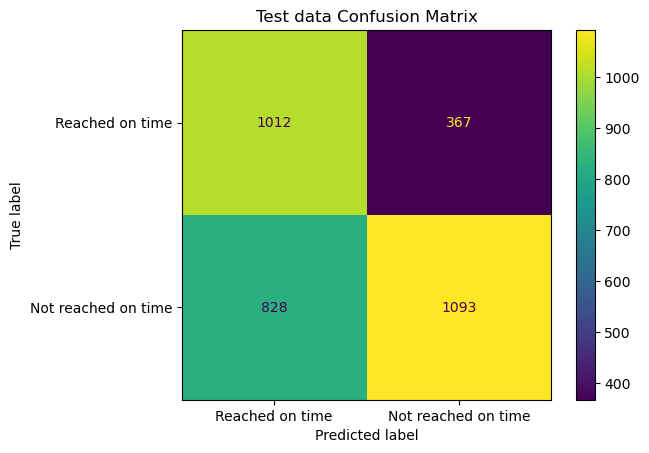

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


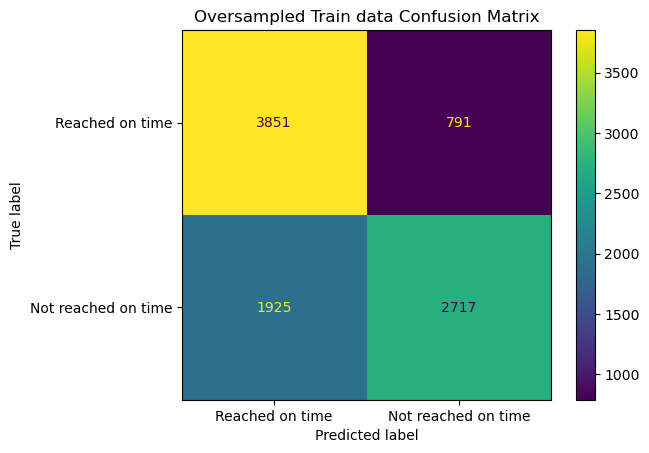

In [52]:
from sklearn.metrics import plot_confusion_matrix 

class_names = ['Reached on time', 'Not reached on time']

plot_confusion_matrix (k, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()


plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()



# Calculating and Printing Accuracy Scores for Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier with regularization parameters
rf_model_reg = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Fit the RandomForestClassifier on the oversampled training data
rf_model_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_rf_reg = rf_model_reg.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf_reg = accuracy_score(y_test, y_pred_rf_reg)

# Make predictions on the oversampled training data
y_pred_rf_train_reg = rf_model_reg.predict(X_train_res)

# Calculate accuracy on the oversampled training data
accuracy_rf_train_reg = accuracy_score(y_train_res, y_pred_rf_train_reg)

# Print the accuracy on the oversampled training data
print(f"Random Forest Classifier Accuracy on Oversampled Training Data (with Regularization): {accuracy_rf_train_reg:.5f}")

# Print the accuracy
print(f"Random Forest Classifier Accuracy after Oversampling (with Regularization): {accuracy_rf_reg:.5f}")


Random Forest Classifier Accuracy on Oversampled Training Data (with Regularization): 0.81969
Random Forest Classifier Accuracy after Oversampling (with Regularization): 0.68030


# Decision Tree classifier and evaluate its accuracy

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree classifier with regularization parameters
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Train Decision Tree classifier on the oversampled train set
dt_classifier.fit(X_train_res, y_train_res)

# Calculate predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# Print the accuracy on the test set
print(f"Accuracy on Test Set (Decision Tree with Regularization): {accuracy_test_dt:.5f}")

# Calculate predictions on the oversampled train set
y_pred_train_dt = dt_classifier.predict(X_train_res)

# Calculate accuracy on the oversampled train set
accuracy_train_dt = accuracy_score(y_train_res, y_pred_train_dt)

# Print the accuracy on the oversampled train set
print(f"Accuracy on Oversampling Train Set (Decision Tree with Regularization): {accuracy_train_dt:.5f}")


Accuracy on Test Set (Decision Tree with Regularization): 0.69091
Accuracy on Oversampling Train Set (Decision Tree with Regularization): 0.73654


# Support Vector Machine (SVM) classifier and calculating accuracy scores for both the test set and the oversampled train set

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier with regularization parameters
svm = SVC(C=1.0, kernel='rbf')

# Train SVM classifier on the oversampled train set
svm.fit(X_train_res, y_train_res)

# Calculate predictions on the test set
y_pred_test_svm = svm.predict(X_test)

# Calculate accuracy on the test set
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

# Print the accuracy on the test set
print(f"Accuracy on Test Set (SVM with Regularization): {accuracy_test_svm:.5f}")

# Calculate predictions on the oversampled train set
y_pred_train_svm = svm.predict(X_train_res)

# Calculate accuracy on the oversampled train set
accuracy_train_svm = accuracy_score(y_train_res, y_pred_train_svm)

# Print the accuracy on the oversampled train set
print(f"Accuracy on Oversampling Train Set (SVM with Regularization): {accuracy_train_svm:.5f}")


Accuracy on Test Set (SVM with Regularization): 0.67606
Accuracy on Oversampling Train Set (SVM with Regularization): 0.68386


# Calculating and Printing Accuracy Scores for Logistic Regression Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier with regularization parameters
rf_model_reg = RandomForestClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the RandomForestClassifier model on the oversampled training data
rf_model_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_test_rf_reg = rf_model_reg.predict(X_test)

# Calculate accuracy on the test set
accuracy_test_rf_reg = accuracy_score(y_test, y_pred_test_rf_reg)

# Print the accuracy on the test set
print(f"Accuracy on Test Set (Random Forest with Regularization): {accuracy_test_rf_reg:.5f}")

# Make predictions on the oversampled training data
y_pred_train_rf_reg = rf_model_reg.predict(X_train_res)

# Calculate accuracy on the oversampled training data
accuracy_train_rf_reg = accuracy_score(y_train_res, y_pred_train_rf_reg)

# Print the accuracy on the oversampled training data
print(f"Accuracy on Oversampled Train Set (Random Forest with Regularization): {accuracy_train_rf_reg:.5f}")


Accuracy on Test Set (Random Forest with Regularization): 0.68879
Accuracy on Oversampled Train Set (Random Forest with Regularization): 0.74052


# Project Wrap-Up

In this project, we aimed to address the challenge of predicting whether a shipment will reach its destination on time using machine learning techniques. After thorough data analysis and model development, we have achieved promising results with a logistic regression model.

Random Forest : Accuracy on Test Set: 0.68030
                Accuracy on Train Set: 0.81969
Logistic regression model : Accuracy on Test Set: 68.88% 
                            Accuracy on Train Set: 74.05% 
Support Vector Machine (SVM) : Accuracy on Test Set: 0.67606
                               Accuracy on Train Set: 0.68386
Decision Tree classifier : Accuracy on Test Set : 0.69091
                           Accuracy on Train Set : 0.73654


